In [3]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Flatten, Dense
import tensorflow as tf
import keras.backend as K
from sklearn.metrics import explained_variance_score
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# make sure TF does not allocate all memory
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

In [5]:
data = np.load('simple_600K_disc0.99_cleaned.npz')
x_train = data['observations']
p_train = data['actions']
v_train = data['rewards']
x_train.shape, p_train.shape, v_train.shape

((594333, 11, 11, 18), (594333,), (594333,))

In [6]:
data = np.load('valid_100K_disc0.99_cleaned.npz')
x_test = data['observations']
p_test = data['actions']
v_test = data['rewards']
x_test.shape, p_test.shape, v_test.shape

((95623, 11, 11, 18), (95623,), (95623,))

In [7]:
x = Input(shape=(11,11,18))
h = Flatten()(x)
h = Dense(128)(h)
h = Dense(128)(h)
p = Dense(6, activation="softmax", name='p')(h)
h = Dense(128)(h)
v = Dense(1, activation="tanh", name='v')(h)
model = Model(x, [p, v])
model.summary()
model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy', 'mse'], metrics={'p': 'accuracy'})

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 11, 11, 18)   0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 2178)         0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          278912      flatten_1[0][0]                  
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          16512       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (D

In [8]:
history = model.fit(x_train, [p_train, v_train], batch_size=128, epochs=10, validation_data=(x_test, [p_test, v_test]))

Train on 594333 samples, validate on 95623 samples
Epoch 1/10
594333/594333 [==============================] - 23s 39us/step - loss: 1.6708 - p_loss: 1.5147 - v_loss: 0.1561 - p_acc: 0.3642 - val_loss: 1.6407 - val_p_loss: 1.4869 - val_v_loss: 0.1538 - val_p_acc: 0.3847
Epoch 2/10
594333/594333 [==============================] - 22s 38us/step - loss: 1.6097 - p_loss: 1.4652 - v_loss: 0.1444 - p_acc: 0.3871 - val_loss: 1.6128 - val_p_loss: 1.4660 - val_v_loss: 0.1467 - val_p_acc: 0.3838
Epoch 3/10
594333/594333 [==============================] - 22s 38us/step - loss: 1.5957 - p_loss: 1.4522 - v_loss: 0.1435 - p_acc: 0.3922 - val_loss: 1.6149 - val_p_loss: 1.4664 - val_v_loss: 0.1485 - val_p_acc: 0.3915
Epoch 4/10
594333/594333 [==============================] - 22s 38us/step - loss: 1.5872 - p_loss: 1.4444 - v_loss: 0.1428 - p_acc: 0.3948 - val_loss: 1.6454 - val_p_loss: 1.4987 - val_v_loss: 0.1468 - val_p_acc: 0.3796
Epoch 5/10
594333/594333 [==============================] - 22s 38us/

Text(0.5,1,'Value MSE')

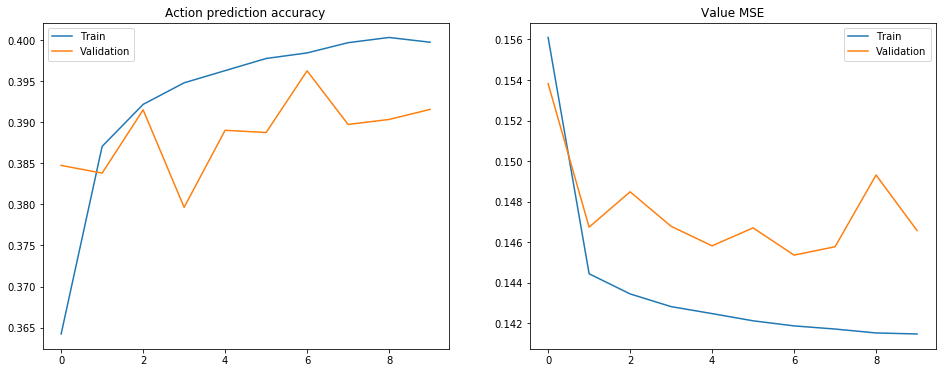

In [9]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['p_acc'])
plt.plot(history.history['val_p_acc'])
plt.legend(['Train', 'Validation'])
plt.title("Action prediction accuracy")
plt.subplot(1, 2, 2)
plt.plot(history.history['v_loss'])
plt.plot(history.history['val_v_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Value MSE")

In [10]:
model.save('dense.h5')